<a href="https://colab.research.google.com/github/polrgn/UPC-Final-Project-Bayesian-Analysis/blob/master/Excess_death/Excess_deaths_model_belgium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("rstan")
install.packages("tidyverse")
install.packages("ggplot2")
library(rstan)
library(ggplot2)
library(tidyverse)
options(mc.cores = parallel::detectCores())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Reading the data

In [55]:

data<- read.csv("weekly_deaths_belgium_week1_17_years2009_2020.csv")
head(data)


,week,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,2353,2277,2390,2313,2228,2258,2483,2148,2549,2382,2337,2299
2,2,2508,2361,2308,2212,2270,2187,2588,2239,2742,2317,2363,2353
3,3,2675,2326,2223,2232,2297,2086,2480,2270,2609,2336,2276,2268
4,4,2571,2204,2084,2232,2406,2078,2589,2305,2663,2253,2403,2203
5,5,2520,2244,2061,2346,2569,2227,2711,2182,3008,2355,2430,2342
6,6,2600,2215,2084,2463,2483,2177,2788,2192,2694,2353,2585,2191


Extracting the data for Belgium


In [58]:
mean <- rowMeans(data[,2:11])[1:16]
data_belgium_2020<-as.matrix(data)[1:16,2:11]
head(data_belgium_2020)
print(mean)

X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018
2353,2277,2390,2313,2228,2258,2483,2148,2549,2382
2508,2361,2308,2212,2270,2187,2588,2239,2742,2317
2675,2326,2223,2232,2297,2086,2480,2270,2609,2336
2571,2204,2084,2232,2406,2078,2589,2305,2663,2253
2520,2244,2061,2346,2569,2227,2711,2182,3008,2355
2600,2215,2084,2463,2483,2177,2788,2192,2694,2353


 [1] 2338.1 2373.2 2353.4 2338.5 2422.3 2404.9 2417.7 2388.7 2375.3 2349.1
[11] 2267.2 2221.7 2152.4 2115.1 2069.0 2032.5


Setting up the stan list

In [59]:
N_belgium <- nrow(data_2020)
N_belgium_year <- ncol(data_2020)
data_list_belgium <- list(
  N = N_belgium, 
  Ny = N_belgium_year,
  E = mean,
  O = data_belgium_2020
  )
print(data_list_belgium)

$N
[1] 16

$Ny
[1] 10

$E
 [1] 2338.1 2373.2 2353.4 2338.5 2422.3 2404.9 2417.7 2388.7 2375.3 2349.1
[11] 2267.2 2221.7 2152.4 2115.1 2069.0 2032.5

$O
      X2009 X2010 X2011 X2012 X2013 X2014 X2015 X2016 X2017 X2018
 [1,]  2353  2277  2390  2313  2228  2258  2483  2148  2549  2382
 [2,]  2508  2361  2308  2212  2270  2187  2588  2239  2742  2317
 [3,]  2675  2326  2223  2232  2297  2086  2480  2270  2609  2336
 [4,]  2571  2204  2084  2232  2406  2078  2589  2305  2663  2253
 [5,]  2520  2244  2061  2346  2569  2227  2711  2182  3008  2355
 [6,]  2600  2215  2084  2463  2483  2177  2788  2192  2694  2353
 [7,]  2406  2208  2118  2673  2432  2209  2786  2121  2659  2565
 [8,]  2199  2207  2035  2776  2489  2206  2781  2165  2401  2628
 [9,]  2281  2154  1984  2639  2498  2050  2487  2315  2343  3002
[10,]  2115  2160  2129  2483  2525  2148  2473  2315  2127  3016
[11,]  2017  2097  2070  2463  2375  2186  2434  2232  2074  2724
[12,]  1961  2088  2086  2236  2377  2148  2286  2337  2

Fit the stan models


In [0]:
death_belgium <- stan("test_spatial_paul.stan", iter = 5000, chains = 3,
  data = data_list_belgium, seed = 1)

In [61]:
print(death_belgium)

Inference for Stan model: test_spatial_paul.
3 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=7500.

                   mean se_mean   sd       2.5%        25%        50%
theta[1,1]         0.01    0.00 0.02      -0.03      -0.01       0.01
theta[1,2]        -0.02    0.00 0.02      -0.06      -0.03      -0.02
theta[1,3]         0.02    0.00 0.02      -0.02       0.01       0.02
theta[1,4]        -0.01    0.00 0.02      -0.05      -0.02      -0.01
theta[1,5]        -0.04    0.00 0.02      -0.08      -0.05      -0.04
theta[1,6]        -0.03    0.00 0.02      -0.07      -0.04      -0.03
theta[1,7]         0.05    0.00 0.02       0.01       0.04       0.05
theta[1,8]        -0.07    0.00 0.02      -0.11      -0.08      -0.07
theta[1,9]         0.07    0.00 0.02       0.03       0.06       0.07
theta[1,10]        0.02    0.00 0.02      -0.02       0.00       0.02
theta[2,1]         0.05    0.00 0.02       0.01       0.04       0.

In [62]:
fit_belgium<-summary(death_belgium)
results_belgium <- as.data.frame(fit_belgium$summary)
print(row.names(results_belgium))

  [1] "theta[1,1]"   "theta[1,2]"   "theta[1,3]"   "theta[1,4]"   "theta[1,5]"  
  [6] "theta[1,6]"   "theta[1,7]"   "theta[1,8]"   "theta[1,9]"   "theta[1,10]" 
 [11] "theta[2,1]"   "theta[2,2]"   "theta[2,3]"   "theta[2,4]"   "theta[2,5]"  
 [16] "theta[2,6]"   "theta[2,7]"   "theta[2,8]"   "theta[2,9]"   "theta[2,10]" 
 [21] "theta[3,1]"   "theta[3,2]"   "theta[3,3]"   "theta[3,4]"   "theta[3,5]"  
 [26] "theta[3,6]"   "theta[3,7]"   "theta[3,8]"   "theta[3,9]"   "theta[3,10]" 
 [31] "theta[4,1]"   "theta[4,2]"   "theta[4,3]"   "theta[4,4]"   "theta[4,5]"  
 [36] "theta[4,6]"   "theta[4,7]"   "theta[4,8]"   "theta[4,9]"   "theta[4,10]" 
 [41] "theta[5,1]"   "theta[5,2]"   "theta[5,3]"   "theta[5,4]"   "theta[5,5]"  
 [46] "theta[5,6]"   "theta[5,7]"   "theta[5,8]"   "theta[5,9]"   "theta[5,10]" 
 [51] "theta[6,1]"   "theta[6,2]"   "theta[6,3]"   "theta[6,4]"   "theta[6,5]"  
 [56] "theta[6,6]"   "theta[6,7]"   "theta[6,8]"   "theta[6,9]"   "theta[6,10]" 
 [61] "theta[7,1]"   "theta[

In [0]:
CI_upper <- exp(results_belgium$`97.5%`)[c(10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160)]
CI_lower <- exp(results_belgium$`2.5%`)[c(10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160)]
theta <- exp(results_belgium$mean)[c(10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160)]


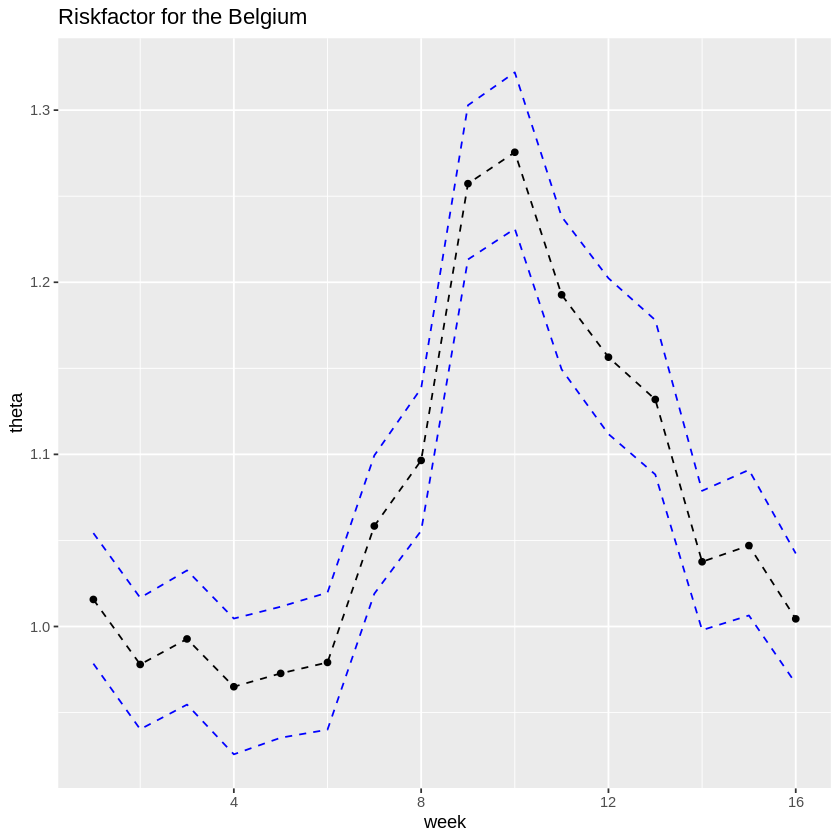

In [64]:
week = seq(1:16)

ggplot(data = data.frame(week, CI_upper, CI_lower, theta), aes(x = week, y = theta)) + geom_point() + geom_line(lty = 2) +
  geom_line(aes(week, CI_lower), col = "blue", lty = 2) +
  geom_line(aes(week, CI_upper), col = "blue", lty = 2) + 
  ggtitle("Riskfactor for the Belgium")